In [1]:
import pandas as pd 

In [2]:
df =pd.read_csv("cars.csv")
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [3]:
df1 = df.rename(columns = {'Weight':'car_weight'})
df1.head()

,Car,MPG,Cylinders,Displacement,Horsepower,car_weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
# we can also drop unwanted columns
# we can use this code for removing independent variable i.e predicted or response variable 
df2 = df.drop(columns =['Origin'])
df2.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70


### Grouping


In [5]:
# indexing by position
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [6]:
grouped = df.groupby('Year')
grouped

In [7]:
grouped.get_group(2014)

,Team,Rank,Year,Points
0,Riders,1,2014,876
2,Devils,2,2014,863
4,Kings,3,2014,741
9,Royals,4,2014,701


## Merge Two DataFrames on a Key


In [8]:
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['akshay', 'Mansi', 'Ketki', 'Aniket', 'Rakesh'],
   'subject':['maths','ml','nlp','python','aws']})
left

,id,Name,subject
0,1,akshay,maths
1,2,Mansi,ml
2,3,Ketki,nlp
3,4,Aniket,python
4,5,Rakesh,aws


In [9]:
right = pd.DataFrame({
    'id':[1,2,3,4,5],
   'Name': ['Vrushali', 'Atul', 'Ganesh', 'vinayak', 'rahul'],
   'subject':['vision','maths','python','nlp','ml']})
right

,id,Name,subject
0,1,Vrushali,vision
1,2,Atul,maths
2,3,Ganesh,python
3,4,vinayak,nlp
4,5,rahul,ml


In [10]:
pd.merge(left,right,on='id')

,id,Name_x,subject_x,Name_y,subject_y
0,1,akshay,maths,Vrushali,vision
1,2,Mansi,ml,Atul,maths
2,3,Ketki,nlp,Ganesh,python
3,4,Aniket,python,vinayak,nlp
4,5,Rakesh,aws,rahul,ml


In [11]:
# inner
pd.merge(left,right,on='subject') 

,id_x,Name_x,subject,id_y,Name_y
0,1,akshay,maths,2,Atul
1,2,Mansi,ml,5,rahul
2,3,Ketki,nlp,4,vinayak
3,4,Aniket,python,3,Ganesh


## join

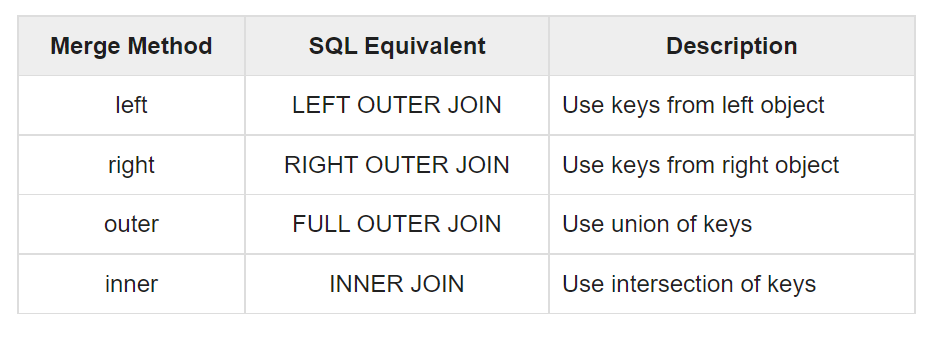

In [12]:
from IPython.display import Image
Image(filename='join.png',width=700,height=200)

In [13]:
# left
pd.merge(left, right, on='subject', how='left')

,id_x,Name_x,subject,id_y,Name_y
0,1,akshay,maths,2.0,Atul
1,2,Mansi,ml,5.0,rahul
2,3,Ketki,nlp,4.0,vinayak
3,4,Aniket,python,3.0,Ganesh
4,5,Rakesh,aws,NaN,NaN


In [14]:
# right
pd.merge(left, right, on='subject', how='right')

,id_x,Name_x,subject,id_y,Name_y
0,NaN,NaN,vision,1,Vrushali
1,1.0,akshay,maths,2,Atul
2,4.0,Aniket,python,3,Ganesh
3,3.0,Ketki,nlp,4,vinayak
4,2.0,Mansi,ml,5,rahul


In [15]:
# union 
pd.merge(left, right, on='subject', how='outer')

,id_x,Name_x,subject,id_y,Name_y
0,1.0,akshay,maths,2.0,Atul
1,2.0,Mansi,ml,5.0,rahul
2,3.0,Ketki,nlp,4.0,vinayak
3,4.0,Aniket,python,3.0,Ganesh
4,5.0,Rakesh,aws,NaN,NaN
5,NaN,NaN,vision,1.0,Vrushali


In [16]:
# intersection
pd.merge(left, right, on='subject', how='inner')

,id_x,Name_x,subject,id_y,Name_y
0,1,akshay,maths,2,Atul
1,2,Mansi,ml,5,rahul
2,3,Ketki,nlp,4,vinayak
3,4,Aniket,python,3,Ganesh


## difference between pandas and numpy

https://www.geeksforgeeks.org/difference-between-pandas-vs-numpy/